In [1]:
import numpy  as np
import pandas as pd
import argparse
import pickle
import os

import hdbscan

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
txt_fdiry = "/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary"
txt_fnote = "annotation.test_chrX.chipseq_full.fcc.tss"

txt_fname_mat = f"matrix.{txt_fnote}.tsv"
txt_fname_map = f"umap.metric_manhattan.n_neighbors_70.{txt_fnote}.tsv"
txt_fname_pkl = f"hdbscan.metric_manhattan.min_cluster_size_1e2.{txt_fnote}.pkl"

print(txt_fname_mat)
print(txt_fname_map)
print(txt_fname_pkl)

matrix.annotation.test_chrX.chipseq_full.fcc.tss.tsv
umap.metric_manhattan.n_neighbors_70.annotation.test_chrX.chipseq_full.fcc.tss.tsv
hdbscan.metric_manhattan.min_cluster_size_1e2.annotation.test_chrX.chipseq_full.fcc.tss.pkl


In [11]:
txt_fname = txt_fname_map
txt_fpath = os.path.join(txt_fdiry, txt_fname)

dat = pd.read_csv(txt_fpath, sep = "\t")

dat_annot_map = dat
print(dat.shape)
dat.head(3)

(2888, 3)


,UMAP1,UMAP2,Region
0,35.867504,-49.957535,chrX:19497-20820
1,36.640360,-52.073940,chrX:95163-95655
2,38.994366,-55.314667,chrX:253624-254054


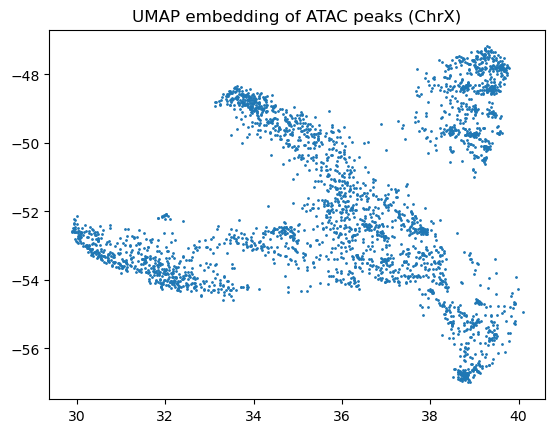

In [12]:
dat = dat_annot_map
plt.scatter(dat.loc[:,"UMAP1"], dat.loc[:,"UMAP2"], s=1)
plt.title('UMAP embedding of ATAC peaks (ChrX)');
plt.show()

In [21]:
txt_fname = txt_fname_pkl
txt_fpath = os.path.join(txt_fdiry, txt_fname)

with open(txt_fpath, 'rb') as file:
    res = pickle.load(file)

res_annot_pkl = res
print(res)

HDBSCAN(gen_min_span_tree=True, metric='manhattan', min_cluster_size=100)


In [22]:
x = res.labels_
unique, counts = np.unique(x, return_counts=True)
dict(zip(unique, counts))

{-1: 2888}